In [1]:
import numpy as np 
import random 
from random import randint

lowx = 0 
lowy = 0 
bumper = 1
highx = 100
highy = 100
NoCell1 = 30
restingRatio1 = 0.5

maxX1 = highx
minX1 = lowx + bumper # in angstrom
    # --- Y axis ---
maxY1 = highy - bumper 
minY1 = lowy + bumper 

numP1 = 0
maxP1 = NoCell1
maxRestingP1 = int(NoCell1*restingRatio1)
maxIter1 = 20000*maxP1
loopcounter1 = 1
xo = np.zeros(NoCell1)
yo = np.zeros(NoCell1)
mig_fac = np.zeros(NoCell1)
auto_fac = np.zeros(NoCell1)
marker = []
restMig = 1
restAuto = 0
actMig = 0
actAuto = 1
coordxrest = []
coordyrest = []
coordxdead = []
coordydead = []
coord = []
minDist = 5

    
#print(maxP1)
while numP1 < maxP1 and loopcounter1 < maxIter1:
    xpossible = randint(minX1,maxX1)
    ypossible = randint(minY1,maxY1)
    if numP1 == 0:
        xo[numP1] = xpossible
        yo[numP1] = ypossible
        # -- marking state of cell -- #
        marker.append('resting')
        mig_fac[numP1] = restMig
        auto_fac[numP1] = restAuto
        # --------------------------- #
        coord.append([xpossible,ypossible,0])
        coordxrest.append(xpossible)
        coordyrest.append(ypossible)
        numP1 = numP1 + 1
        continue

    distance1 = np.sqrt((xo-xpossible)**2 + (yo-ypossible)**2)
    if min(distance1) >= minDist:
        xo[numP1] = xpossible
        yo[numP1] = ypossible
        coord.append([xpossible,ypossible,0])
        # -- marking state of cell -- #
        if numP1 <= maxRestingP1:
            marker.append('resting')
            mig_fac[numP1] = restMig
            auto_fac[numP1] = restAuto
            coordxrest.append(xpossible)
            coordyrest.append(ypossible)
        elif numP1 > maxRestingP1:
            marker.append('activated')
            mig_fac[numP1] = actMig
            auto_fac[numP1] = actAuto
            coordxdead.append(xpossible)
            coordydead.append(ypossible)
            # --------------------------- #
        numP1 = numP1 + 1
    loopcounter1 = loopcounter1 + 1



In [2]:
import matplotlib.pyplot as plt 

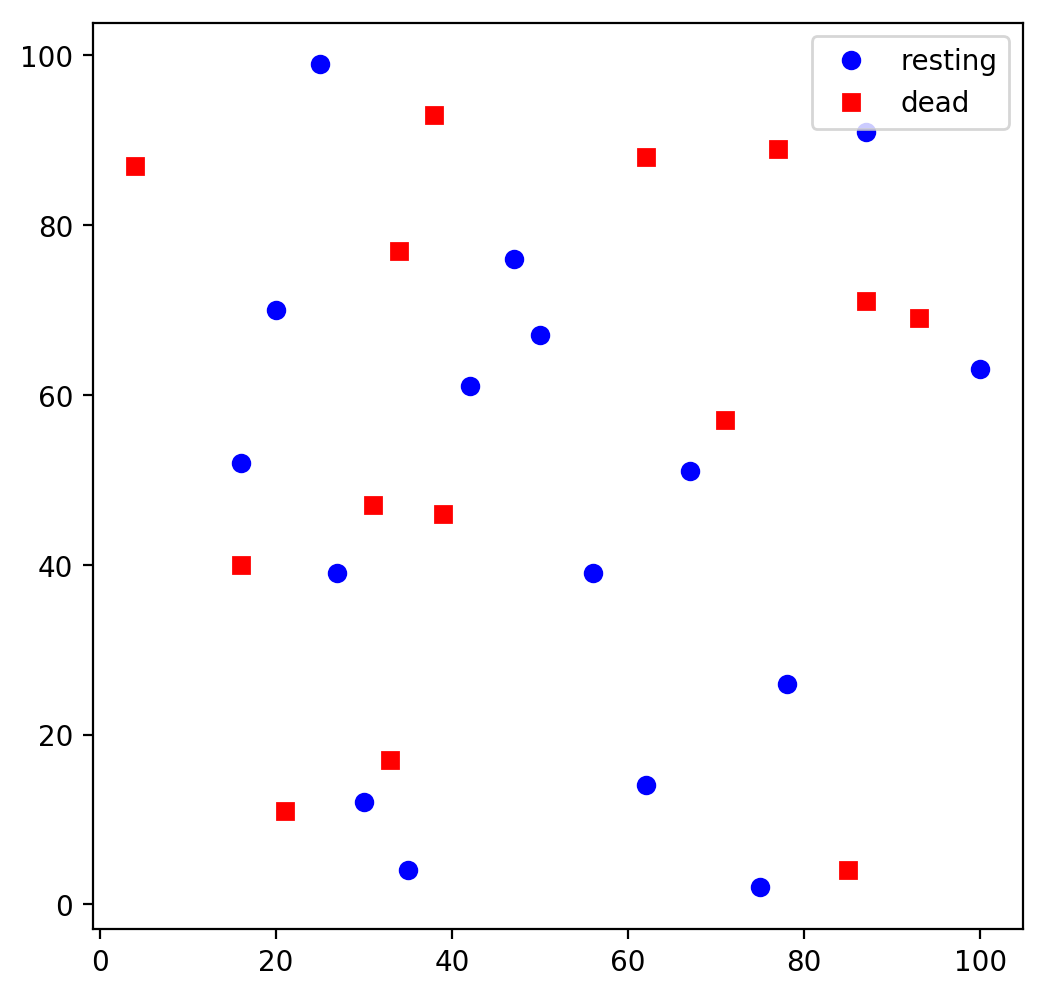

In [3]:
plt.figure(figsize=(6,6),dpi=200)
plt.plot(coordxrest,coordyrest,'bo',alpha=1,label='resting')
plt.plot(coordxdead,coordydead,'rs',alpha=1,label='dead')
plt.legend(loc=0)

In [12]:
x = np.random.randint(0,10,size=(10))

In [13]:
print(x)

[7 3 5 3 0 6 2 5 4 8]


In [28]:
x = np.zeros([3,4])

x[0][0] = 40

print(x[1][:])

[0. 0. 0. 0.]


In [34]:
grid = {}
for i in np.arange(16):
    grid[str(i)] = [i - 4*(i//4),i//4]

(0, 100)

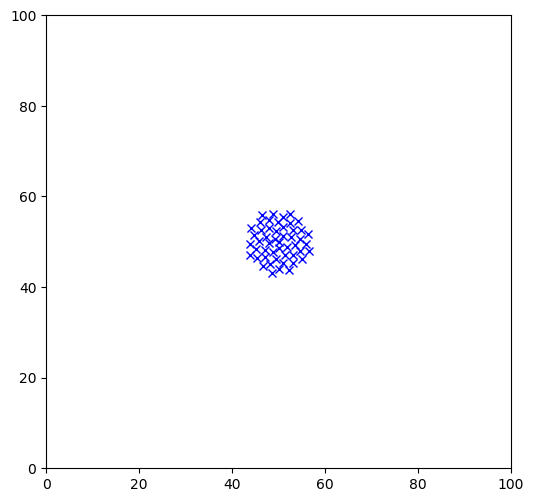

In [11]:
import math 

coordx = []
coordy = []

angle = 137.508
phi = angle * ( math.pi / 180.0 )
xcenter = 50.0
ycenter = 50.0
cspread = 1
t = 50 

# for loops iterate in this case from the first value until < 4, so
for n in range (0,t):
    r = cspread * math.sqrt(n)
    theta = n * phi

    x = r * math.cos(theta) + xcenter
    y = r * math.sin(theta) + ycenter
    
    coordx.append(x)
    coordy.append(y)
    
plt.figure(figsize=(6,6),dpi=100)
plt.plot(coordx,coordy,'bx',alpha=1,label='resting')
plt.xlim([0,100])
plt.ylim([0,100])


In [175]:
# step 0: basic aspect of this population 
NoOfCore = 20 
deadCoreRatio = 0.5

lowx = 0 
lowy = 0 
bumper = 1
highx = 100
highy = 100
# step 1: determine number of dead cell core 
NoOfDeadCore = int(NoOfCore*deadCoreRatio)
NoOfRestCell = NoOfCore - NoOfDeadCore
NoOfCellinCluster = []
for i in np.arange(NoOfDeadCore):
    NoOfCellinCluster.append(randint(1,16))
# step 2: determine number of dead cells
NoOfDeadCells = np.sum(NoOfCellinCluster)
print(NoOfDeadCells)
# step 3: determine a total number of cells 
TotalNoCell = NoOfDeadCells + NoOfRestCell
#####################################################################
def cluster(xcenter,ycenter,xcoord,ycoord,mig_fac,auto_fact,marker,numCells,restMig,restAuto):
    angle = 137.508
    phi = angle * ( math.pi / 180.0 )
    cspread = numCells/4
    t = numCells
   
    # for loops iterate in this case from the first value until < 4, so
    for n in range (0,t):
        r = cspread * math.sqrt(n)
        theta = n * phi

        x = r * math.cos(theta) + xcenter
        y = r * math.sin(theta) + ycenter
    
        xcoord.append(x)
        ycoord.append(y)
        coord.append([x,y,0])
        marker.append('resting')
        mig_fac.append(restMig)
        auto_fac.append(restAuto)
    
    return xcoord, ycoord, coord, mig_fac, auto_fac, marker
###########################################################################

maxX1 = highx
minX1 = lowx + bumper # in angstrom
    # --- Y axis ---
maxY1 = highy - bumper 
minY1 = lowy + bumper 

numP1 = 0
maxP1 = TotalNoCell
maxDeadP1 = NoOfDeadCells
maxIter1 = 20000*maxP1
loopcounter1 = 1
xo = []
yo = []
mig_fac = []
auto_fac = []
marker = []
restMig = 1
restAuto = 0
actMig = 0
actAuto = 1

coordx = []
coordy = []
coordxdead = []
coordydead = []
coord = []

minDist = 5

deadcellcore = 0
    
# step 4: placing dead cell randomly

while numP1 < TotalNoCell and loopcounter1 < maxIter1:
    xpossible = randint(minX1,maxX1)
    ypossible = randint(minY1,maxY1)
    if numP1 == 0:
        #xo.append(xpossible)
        #yo.append(ypossible)
        numOfCells = NoOfCellinCluster[deadcellcore]
        xo, yo, coord, mig_fac, auto_fac, marker = cluster(xpossible,ypossible,xo,yo,mig_fac,auto_fac,marker,numOfCells,restMig,restAuto)
        # --------------------------- #
        numP1 = numP1 + numOfCells
        continue

    distance1 = np.sqrt((np.asarray(xo)-xpossible)**2 + (np.asarray(yo)-ypossible)**2)
    if min(distance1) >= minDist:
        #xo.append(xpossible)
        #yo.append(ypossible)
        coord.append([xpossible,ypossible,0])
        # -- marking state of cell -- #
        if numP1 <= NoOfDeadCells and deadcellcore < NoOfDeadCore:
            numOfCells = NoOfCellinCluster[deadcellcore]
            xo, yo, coord, mig_fac, auto_fac, marker = cluster(xpossible,ypossible,xo,yo,mig_fac,auto_fac,marker,numOfCells,restMig,restAuto)
            numP1 = numP1 + numOfCells
            deadcellcore += 1 
        elif numP1 > NoOfDeadCells or deadcellcore >= NoOfDeadCore:
            marker.append('activated')
            mig_fac.append(actMig)
            auto_fac.append(actAuto)
            xo.append(xpossible)
            yo.append(ypossible)
            coordx.append(xpossible)
            coordy.append(ypossible)
            numP1 = numP1 + 1
        
    loopcounter1 = loopcounter1 + 1

80


In [189]:
# step 0: basic aspect of this population 
NoOfCore = 30 
deadCoreRatio = 0.25

lowx = 0 
lowy = 0 
bumper = 1
highx = 100
highy = 100
# step 1: determine number of dead cell core 
NoOfDeadCore = int(NoOfCore*deadCoreRatio)
NoOfRestCell = NoOfCore - NoOfDeadCore
NoOfCellinCluster = []
for i in np.arange(NoOfDeadCore):
    NoOfCellinCluster.append(randint(5,20))
# step 2: determine number of dead cells
NoOfDeadCells = np.sum(NoOfCellinCluster)
print(NoOfDeadCells)
# step 3: determine a total number of cells 
TotalNoCell = NoOfDeadCells + NoOfRestCell
#####################################################################
def cluster(xcenter,ycenter,xcoord,ycoord,mig_fac,auto_fact,marker,numCells,restMig,restAuto):
    angle = 137.508
    phi = angle * ( math.pi / 180.0 )
    cspread = numCells/4
    t = numCells
   
    # for loops iterate in this case from the first value until < 4, so
    for n in range (0,t):
        r = cspread * math.sqrt(n)
        theta = n * phi

        x = r * math.cos(theta) + xcenter
        y = r * math.sin(theta) + ycenter
    
        xcoord.append(x)
        ycoord.append(y)
        coord.append([x,y,0])
        marker.append('resting')
        mig_fac.append(restMig)
        auto_fac.append(restAuto)
    
    return xcoord, ycoord, coord, mig_fac, auto_fac, marker
###########################################################################

maxX1 = highx
minX1 = lowx + bumper # in angstrom
    # --- Y axis ---
maxY1 = highy - bumper 
minY1 = lowy + bumper 

numP1 = 0
maxP1 = TotalNoCell
maxDeadP1 = NoOfDeadCells
maxIter1 = 20000*maxP1
loopcounter1 = 1
xo = []
yo = []
mig_fac = []
auto_fac = []
marker = []
restMig = 1
restAuto = 0
actMig = 0
actAuto = 1

coordx = []
coordy = []
coordxdead = []
coordydead = []
coord = []

minDist = 10

deadcellcore = 0
    
# step 4: placing dead cell randomly

while numP1 < NoOfDeadCore and loopcounter1 < maxIter1:
    xpossible = randint(minX1,maxX1)
    ypossible = randint(minY1,maxY1)
    if numP1 == 0:
        numOfCells = NoOfCellinCluster[numP1]
        xo, yo, coord, mig_fac, auto_fac, marker = cluster(xpossible,ypossible,xo,yo,mig_fac,auto_fac,marker,numOfCells,restMig,restAuto)
        numP1 = numP1 + 1
        continue

    distance1 = np.sqrt((np.asarray(xo)-xpossible)**2 + (np.asarray(yo)-ypossible)**2)
    if min(distance1) >= minDist:
        numOfCells = NoOfCellinCluster[numP1]
        xo, yo, coord, mig_fac, auto_fac, marker = cluster(xpossible,ypossible,xo,yo,mig_fac,auto_fac,marker,numOfCells,restMig,restAuto)
        numP1 = numP1 + 1
        
    loopcounter1 = loopcounter1 + 1

numP1 = 0
loopcounter1 = 1

while numP1 < NoOfRestCell and loopcounter1 < maxIter1:
    xpossible = randint(minX1,maxX1)
    ypossible = randint(minY1,maxY1)
    distance1 = np.sqrt((np.asarray(xo)-xpossible)**2 + (np.asarray(yo)-ypossible)**2)
    if min(distance1) >= minDist:
        xo.append(xpossible)
        yo.append(ypossible)
        mig_fac.append(actMig)
        auto_fac.append(actAuto)
        marker.append('Active')
        coordx.append(xpossible)
        coordy.append(ypossible)
        numP1 = numP1 + 1
        
    loopcounter1 = loopcounter1 + 1
    
print(len(xo))
print(len(coordx))

59
82
23


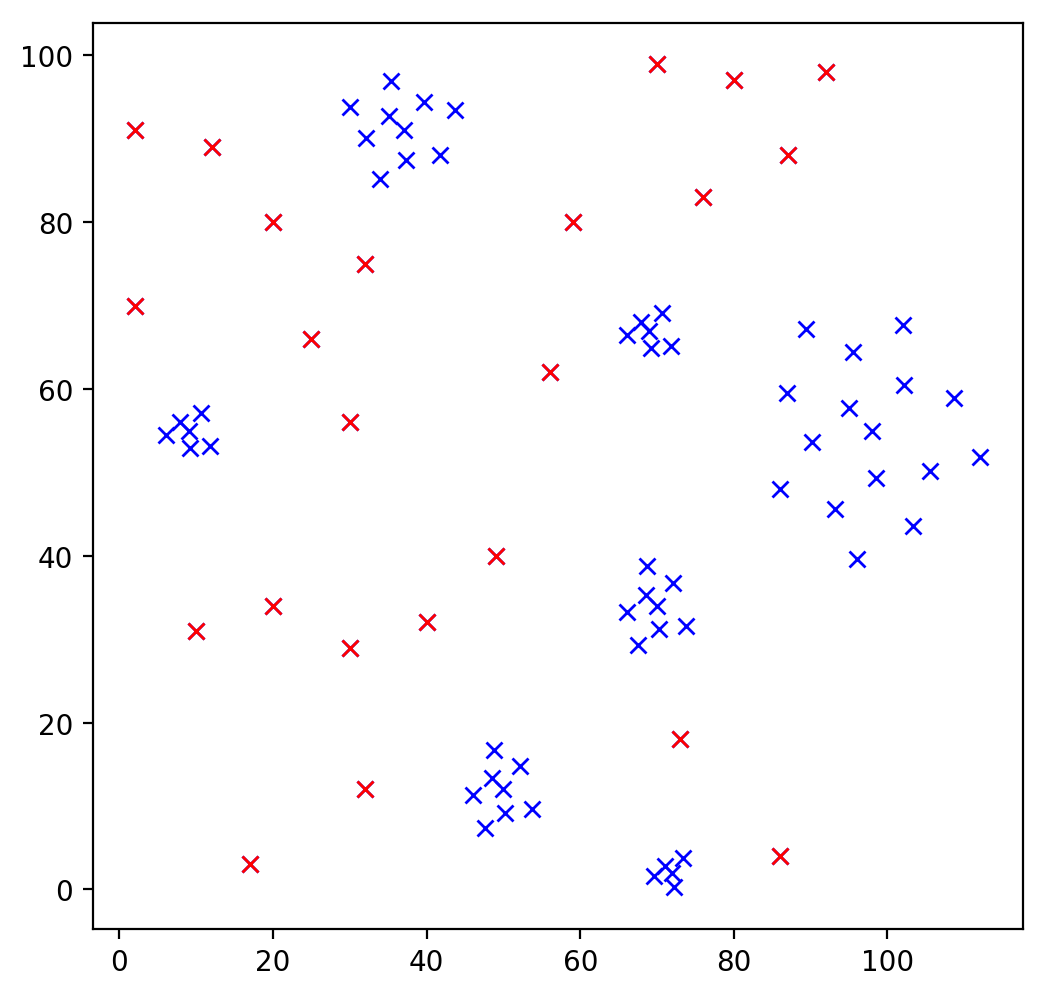

In [190]:
plt.figure(figsize=(6,6),dpi=200)
plt.plot(xo,yo,'bx',alpha=1,label='resting')
plt.plot(coordx,coordy,'rx')


In [193]:
coord = [[1,2,3],[2,4,2]]
len(coord)

2

In [ ]:
    #print(numP1)
    ## Second box ##
    ### Configuring dimension where particles are placed
# --- X axis ---
maxX2 = CentoR*2 - bumper # in angstrom 
minX2 = CentoR + bumper # in angstrom
# --- Y axis ---
maxY2 = highy - bumper 
minY2 = lowy + bumper 

numP2 = 0
maxP2 = NoCell2
maxRestingP2 = int(NoCell2*restingRatio2)
maxIter2 = 20000*NoCell2
loopcounter2 = 1
xo2 = np.zeros(NoCell2)
yo2 = np.zeros(NoCell2)
#print(maxP2)    
while numP2 < maxP2 and loopcounter2 < maxIter2:
    xpossible = randint(minX2,maxX2)
    ypossible = randint(minY2,maxY2)
    if numP2 == 0:
        xo2[numP2] = xpossible
        yo2[numP2] = ypossible
        # -- marking state of cell -- #
        marker.append('resting')
        migration_factor[numP1+numP2] = restMig
        autocrine_factor[numP1+numP2] = restAuto
        # --------------------------- #
        coord.append([xpossible,ypossible,0])
        coordtoYaml[str(numP1+numP2)] = [xpossible/10,ypossible/10,0]
        numP2 = numP2 + 1
        continue

    distance1 = np.sqrt((xo2-xpossible)**2 + (yo2-ypossible)**2)
    if min(distance1) >= minDist:
        xo2[numP2] = xpossible
        yo2[numP2] = ypossible
        coord.append([xpossible,ypossible,0])
        coordtoYaml[str(numP1+numP2)] = [xpossible/10,ypossible/10,0]
        # -- marking state of cell -- #
        if numP2 <= maxRestingP2:
            marker.append('resting')
            migration_factor[numP1+numP2] = restMig
            autocrine_factor[numP1+numP2] = restAuto
        elif numP2 > maxRestingP2:
            marker.append('activated')
            migration_factor[numP1+numP2] = actMig
            autocrine_factor[numP1+numP2] = actAuto
        # --------------------------- #
        numP2 = numP2 + 1
    loopcounter2 = loopcounter2 + 1
    